In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and loading the dataset

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

## performing univariate analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

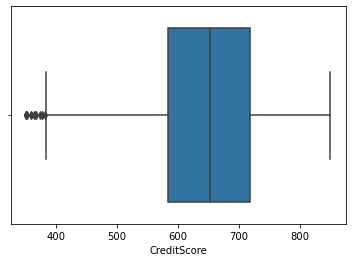

In [6]:
sns.boxplot(df["CreditScore"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

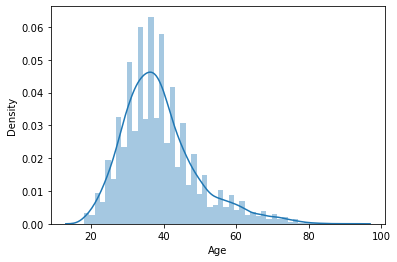

In [7]:
sns.distplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

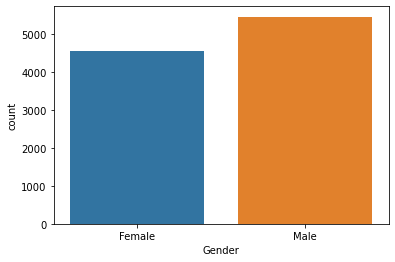

In [8]:
sns.countplot(df['Gender'])

## performing bivariate analysis

<AxesSubplot:>

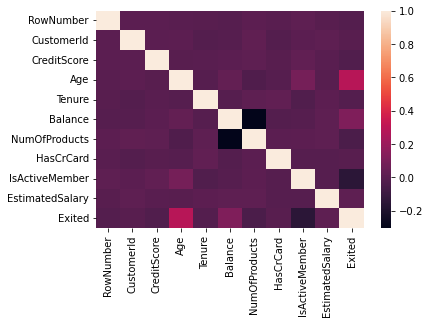

In [9]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


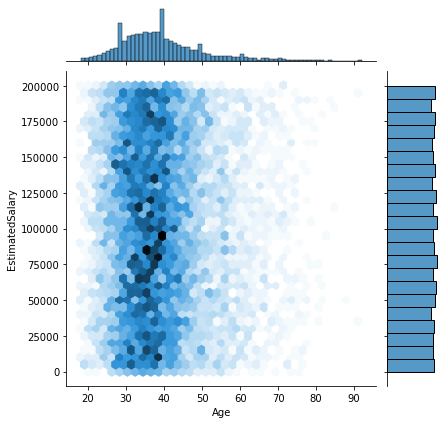

In [10]:
sns.jointplot(df['Age'],df['EstimatedSalary'],kind='hex')

## performing multivariate analysis

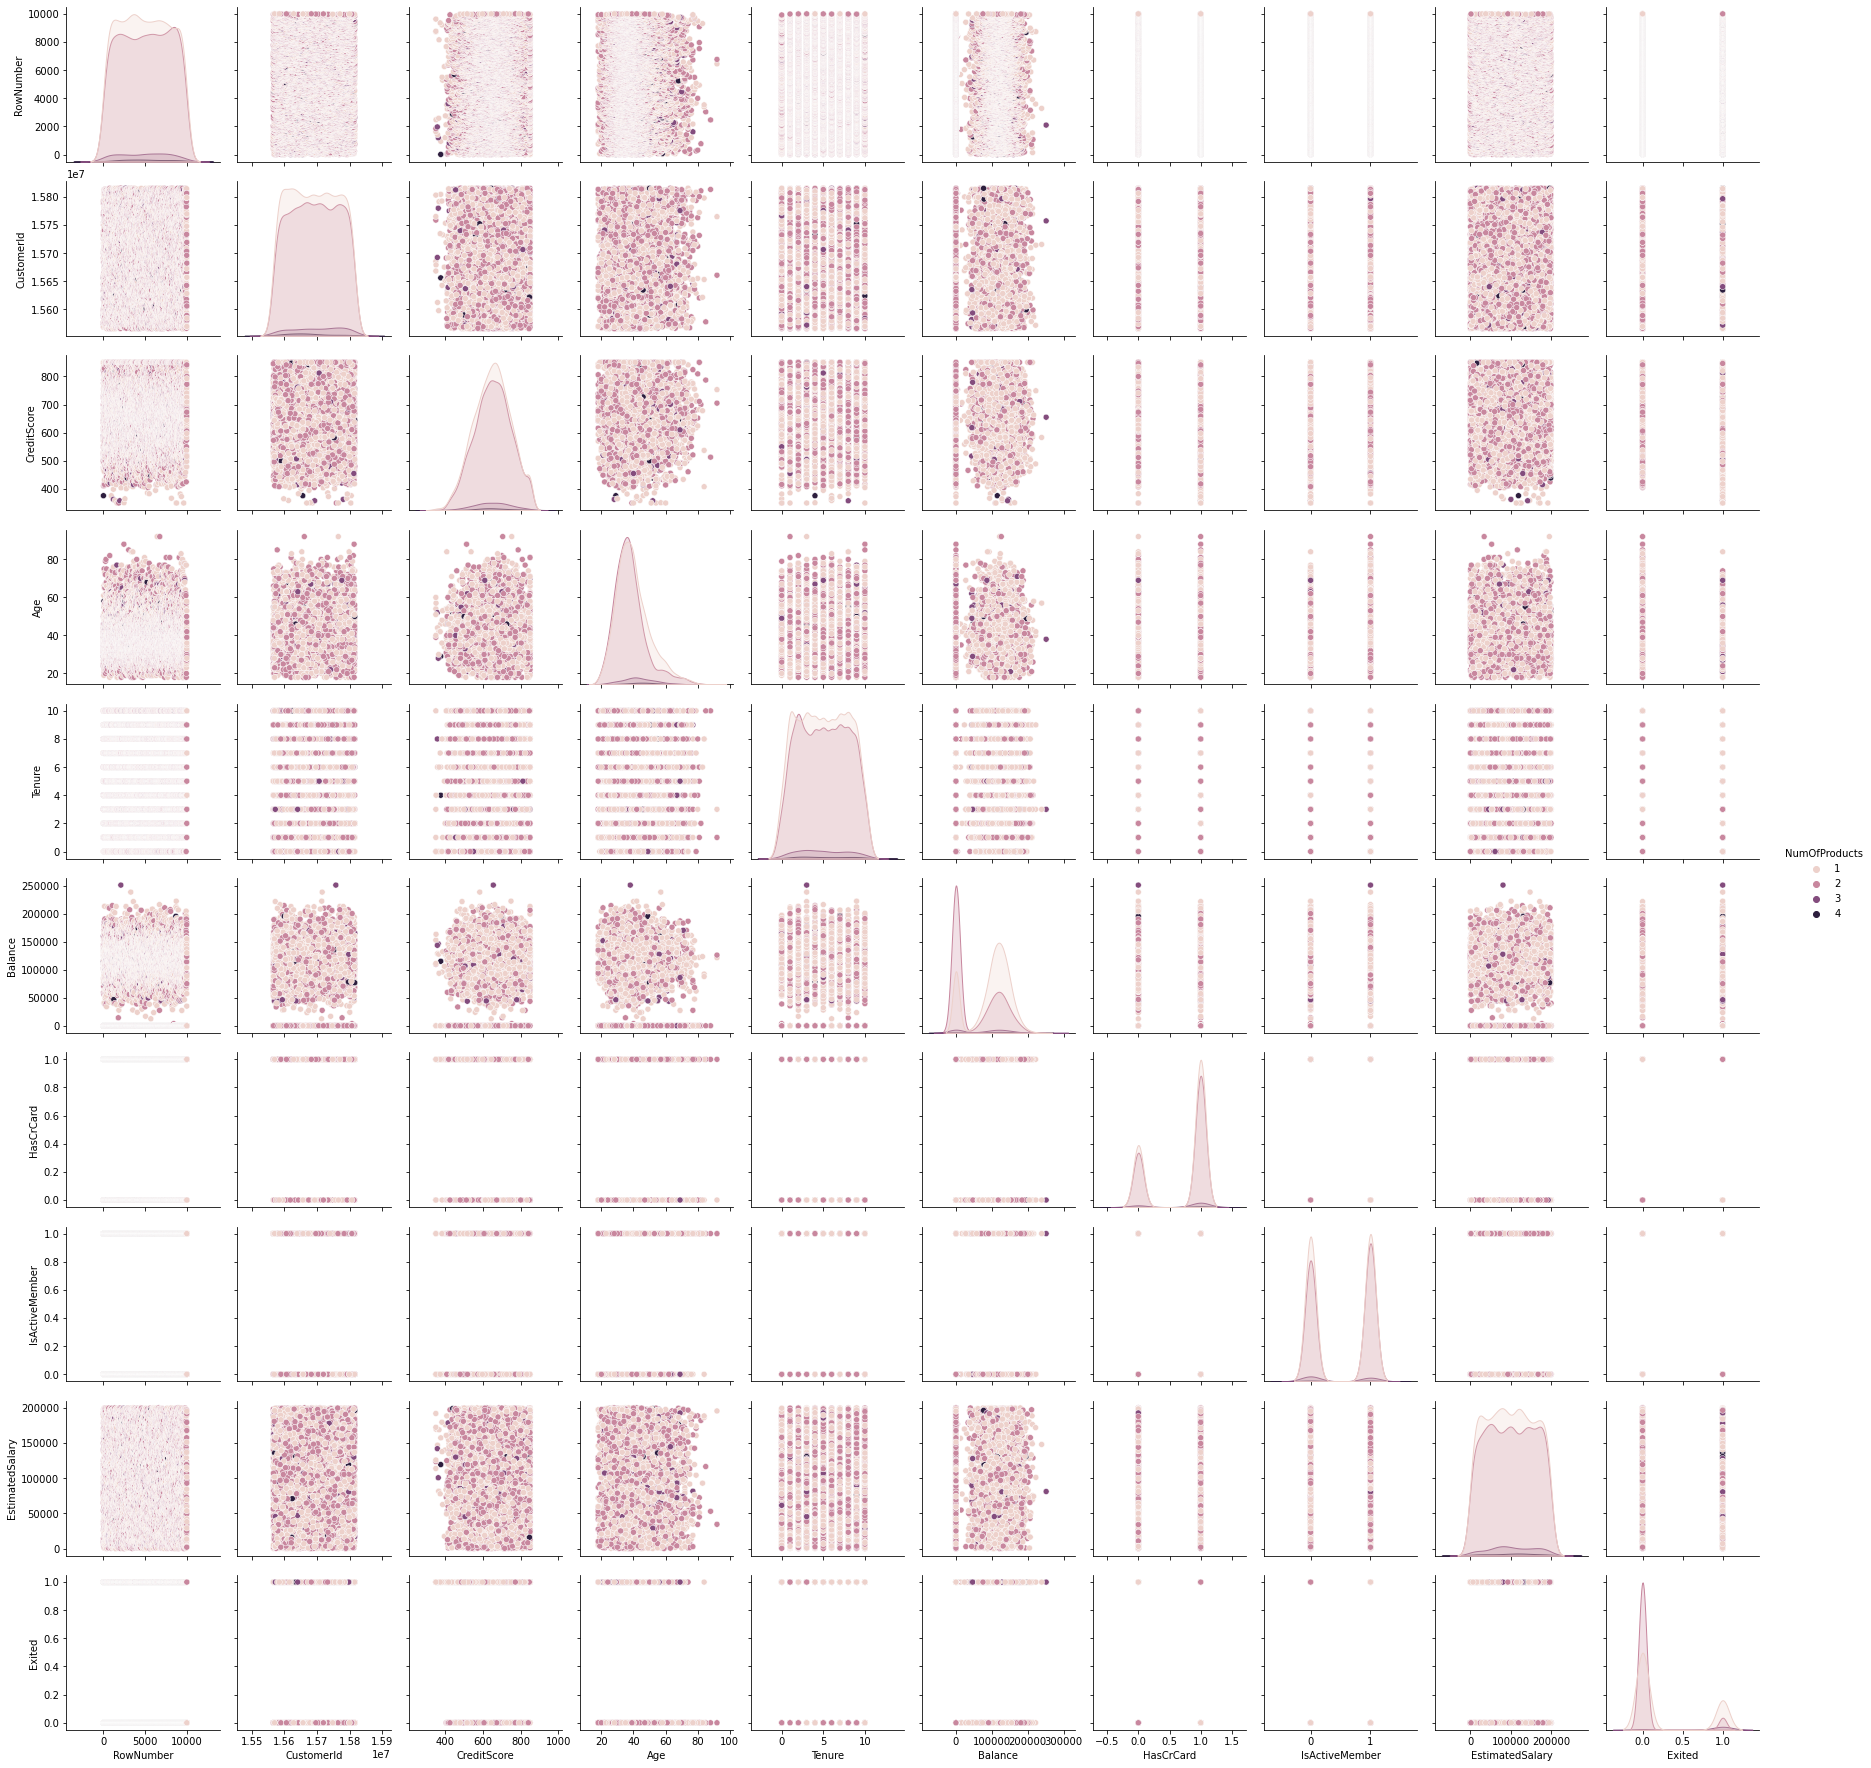

In [12]:
sns.pairplot(df,hue='NumOfProducts')

## Descriptive Statistics on the dataset

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handling missing values

In [16]:
df.isnull().sum() #no missing values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Find out outliers and replace outliers 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

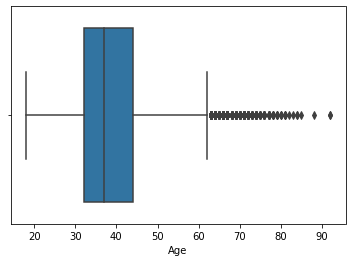

In [20]:
sns.boxplot(df['Age'])

In [22]:
##outlier removal using IQR method for age 
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR=Q3-Q1
IQR

12.0

In [23]:
upperlimit=Q3+1.5*IQR
lowerlimit=Q1-1.5*IQR
print(lowerlimit,upperlimit)

14.0 62.0


In [26]:
df=df[df.Age<upperlimit]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

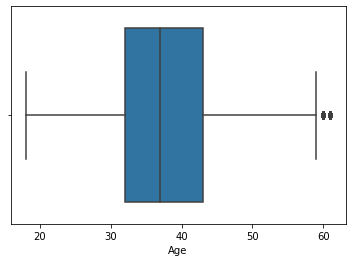

In [27]:
sns.boxplot(df['Age']) #now outliers are removed 

In [29]:
##outlier removal using IQR method for creditScore
Q11=df.CreditScore.quantile(0.25)
Q31=df.CreditScore.quantile(0.75)
IQR1=Q31-Q11
IQR1

134.0

In [30]:
upperlimit1=Q31+1.5*IQR1
lowerlimit1=Q11-1.5*IQR1
print(lowerlimit1,upperlimit1)

382.0 918.0


In [31]:
df=df[df.CreditScore>lowerlimit1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

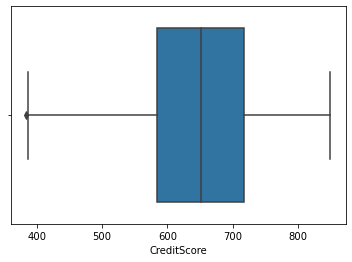

In [32]:
sns.boxplot(df['CreditScore']) #outliers are removed now 

## Perform encoding for categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le1= LabelEncoder()
le2= LabelEncoder()

In [37]:
df['Gender']=le1.fit_transform(df.Gender)
df['Geography']=le2.fit_transform(df.Geography)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Splitting data into independent and dependent variables

In [46]:
#initially removing unwanted columnns
df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [47]:
X=df.iloc[:,:-1]
X #independent variable

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [48]:
Y=df.iloc[:,-1]
Y #dependent variable

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9574, dtype: int64

## Scaling the independent variables

In [49]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.33045647, -0.90148502, -1.09701971, ...,  0.64600349,
         0.99499893,  0.02100483],
       [-0.44497942,  1.51712717, -1.09701971, ..., -1.54797926,
         0.99499893,  0.21565309],
       [-1.54856422, -0.90148502, -1.09701971, ...,  0.64600349,
        -1.00502621,  0.23980637],
       ...,
       [ 0.60654949, -0.90148502, -1.09701971, ..., -1.54797926,
         0.99499893, -1.00953004],
       [ 1.26245367,  0.30782107,  0.91156065, ...,  0.64600349,
        -1.00502621, -0.12611313],
       [ 1.47067722, -0.90148502, -1.09701971, ...,  0.64600349,
        -1.00502621, -1.07725707]])

## Splitting the data into training and testing 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=0)

In [58]:
X_train

array([[ 0.05475709, -0.90148502,  0.91156065, ..., -1.54797926,
         0.99499893, -0.56167002],
       [ 1.00217423, -0.90148502, -1.09701971, ..., -1.54797926,
         0.99499893,  0.51860548],
       [-1.45486362, -0.90148502,  0.91156065, ...,  0.64600349,
         0.99499893,  1.08609757],
       ...,
       [ 0.76271716,  1.51712717, -1.09701971, ..., -1.54797926,
        -1.00502621,  1.48503269],
       [ 0.40873712, -0.90148502, -1.09701971, ...,  0.64600349,
         0.99499893, -0.87887381],
       [-1.43404127,  1.51712717,  0.91156065, ...,  0.64600349,
         0.99499893,  0.25332743]])

In [59]:
y_train

3091    0
7257    1
298     0
5630    0
4841    1
       ..
8238    0
9634    0
5082    1
3402    0
2842    1
Name: Exited, Length: 6701, dtype: int64

In [60]:
X_test

array([[-1.43404127,  0.30782107,  0.91156065, ..., -1.54797926,
        -1.00502621,  0.42481794],
       [ 1.0646413 , -0.90148502,  0.91156065, ...,  0.64600349,
         0.99499893,  1.06944873],
       [-1.27787361, -0.90148502,  0.91156065, ..., -1.54797926,
        -1.00502621, -0.34708326],
       ...,
       [-0.00770997,  1.51712717,  0.91156065, ...,  0.64600349,
         0.99499893,  0.231774  ],
       [ 0.08599063,  1.51712717,  0.91156065, ...,  0.64600349,
        -1.00502621,  1.34486358],
       [ 1.64766723, -0.90148502, -1.09701971, ...,  0.64600349,
        -1.00502621, -0.39012769]])

In [61]:
X_train.shape

(6701, 10)